In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [132]:
import re
import spacy
nlp = spacy.load("en_core_web_sm")

In [133]:
text_arabic = """تُعد وسائل التواصل الاجتماعي من أهم الظواهر التي أثرت على حياة الإنسان في العصر الحديث. فقد أصبحت جزءًا لا يتجزأ من حياتنا اليومية، حيث يستخدمها الملايين من الناس حول العالم للتواصل مع الآخرين ومشاركة الأفكار والمعلومات.

### التأثيرات الإيجابية
من أبرز التأثيرات الإيجابية لوسائل التواصل الاجتماعي قدرتها على تقريب المسافات بين الناس، سواء كانوا يعيشون في نفس البلد أو في قارات مختلفة. كما تُعتبر منصة للتعلم واكتساب المهارات الجديدة من خلال المحتوى التعليمي الذي يُنشر بشكل دوري. علاوة على ذلك، تُعد وسائل التواصل الاجتماعي وسيلة فعالة للترويج للأعمال التجارية، حيث يمكن لأصحاب الشركات التواصل مع جمهورهم بسهولة وتحقيق نجاحات كبيرة.

لا ننسى أيضًا الدور الذي تلعبه وسائل التواصل الاجتماعي في الأزمات والطوارئ. فهي تُستخدم لنشر التحذيرات العاجلة، مثل الكوارث الطبيعية أو الأحداث العالمية المهمة، مما يسهم في إنقاذ الأرواح وتوعية الناس بالتصرفات الصحيحة.

### التأثيرات السلبية
رغم الفوائد العديدة، لا يمكن تجاهل التأثيرات السلبية لهذه الوسائل. فقد أصبحت مصدرًا للإدمان بالنسبة لكثيرين، حيث يقضون ساعات طويلة يوميًا في تصفح المحتوى دون تحقيق أي فائدة تذكر. بالإضافة إلى ذلك، قد تؤدي إلى العزلة الاجتماعية في بعض الأحيان، حيث يفضل الأفراد التفاعل عبر الإنترنت بدلاً من اللقاءات الواقعية.

من الجوانب الأخرى المثيرة للقلق هو انتشار الأخبار المزيفة والشائعات بسرعة كبيرة، مما يؤدي إلى تأثيرات سلبية على المجتمعات. كما قد تسبب وسائل التواصل الاجتماعي مشاكل نفسية للأفراد، مثل الشعور بالنقص أو الاكتئاب، نتيجة لمقارنة أنفسهم بالآخرين.

### التأثيرات على الصحة النفسية
تلعب وسائل التواصل الاجتماعي دورًا كبيرًا في تشكيل الصحة النفسية للأفراد. فقد أظهرت الدراسات أن الاستخدام المفرط لهذه الوسائل يمكن أن يؤدي إلى اضطرابات نفسية مثل القلق الاجتماعي والاكتئاب. على سبيل المثال، يقارن العديد من الأشخاص حياتهم الشخصية بما يرونه على وسائل التواصل الاجتماعي، مما يولد شعورًا بالإحباط أو الفشل.

### المسؤولية المجتمعية
للتغلب على هذه المشكلات، ينبغي على الأفراد والمؤسسات تحمل مسؤولية استخدام وسائل التواصل الاجتماعي بحكمة. يمكن للمؤسسات التعليمية إدخال برامج توعية حول كيفية الاستخدام الآمن لهذه الوسائل. كما يمكن للشركات التكنولوجية تحسين خوارزميات منصاتها لتقليل المحتوى الضار وزيادة المحتوى الإيجابي.

### الاستخدام في التعليم
أحد الاستخدامات البارزة لوسائل التواصل الاجتماعي هو التعليم الإلكتروني. حيث تتيح هذه الوسائل للطلاب الوصول إلى موارد تعليمية مجانية، والتواصل مع الخبراء، والمشاركة في مجموعات تعليمية. كما تسهم في تعزيز التعلم التعاوني، حيث يمكن للطلاب تبادل المعلومات والأفكار.

### الخلاصة
في النهاية، يعتمد تأثير وسائل التواصل الاجتماعي على كيفية استخدامها. فإذا تم استخدامها بشكل إيجابي ومسؤول، يمكن أن تكون وسيلة قوية لتحسين حياتنا وتعزيز تواصلنا مع العالم. أما إذا أُسيء استخدامها، فقد تكون مصدرًا للعديد من المشكلات التي تؤثر على الأفراد والمجتمع.

لذا، من الضروري أن نكون واعين بتأثيرات وسائل التواصل الاجتماعي، وأن نعمل على تعزيز الجانب الإيجابي منها والحد من آثارها السلبية. كما يجب تشجيع الأبحاث حول كيفية تقليل التأثيرات الضارة لهذه الوسائل وتعظيم فوائدها.


تُعد وسائل التواصل الاجتماعي من أكثر الظواهر تأثيرًا في العالم الحديث. فهي تلعب دورًا رئيسيًا في تشكيل حياة الناس اليومية، سواء من خلال التواصل الاجتماعي، التعليم، الترفيه، أو حتى ممارسة الأعمال التجارية. ورغم أن هذه الوسائل تحمل العديد من الفوائد، إلا أن تأثيراتها السلبية أصبحت أيضًا محور اهتمام الباحثين والمجتمعات على حد سواء.

### التأثيرات الإيجابية لوسائل التواصل الاجتماعي
من الجوانب المشرقة لوسائل التواصل الاجتماعي قدرتها على تقريب المسافات بين الناس، حيث يمكن للأفراد التواصل مع أصدقائهم وأقاربهم بسهولة، حتى لو كانوا يعيشون في أماكن بعيدة. كما أنها وسيلة تعليمية فعالة، حيث توفر محتوى تعليميًا متنوعًا في مجالات مثل التكنولوجيا، العلوم، واللغات. إضافةً إلى ذلك، تمثل وسائل التواصل الاجتماعي منصة للترويج للأعمال التجارية، مما يُمكن الشركات من الوصول إلى جمهور واسع دون الحاجة إلى ميزانيات تسويقية ضخمة.

علاوة على ذلك، أصبحت وسائل التواصل الاجتماعي مصدرًا للمعلومات السريعة، حيث يمكن متابعة الأخبار المحلية والعالمية بمجرد حدوثها. كما أنها تشجع على الإبداع، إذ تتيح للمستخدمين التعبير عن أنفسهم من خلال الصور، الفيديوهات، والكتابة.

### التأثيرات السلبية لوسائل التواصل الاجتماعي
مع كل هذه الفوائد، تأتي أيضًا العديد من السلبيات. من أبرزها الإدمان على استخدام هذه الوسائل، حيث يقضي الكثير من الأشخاص ساعات طويلة يوميًا في تصفحها، مما يؤدي إلى تراجع الإنتاجية في العمل والدراسة. كما أن وسائل التواصل الاجتماعي قد تؤثر سلبًا على الصحة النفسية، إذ يشعر البعض بالضيق أو الاكتئاب بسبب مقارنة حياتهم بالصور والمشاركات التي يرونها.

بالإضافة إلى ذلك، تُعد وسائل التواصل الاجتماعي أرضًا خصبة للشائعات والأخبار الكاذبة. في كثير من الأحيان، تُنشر معلومات غير دقيقة تؤدي إلى تأثيرات سلبية على الأفراد والمجتمعات. كما قد تشكل خطرًا على الخصوصية، حيث يمكن أن تتعرض بيانات المستخدمين الشخصية للاختراق أو الاستخدام غير المشروع.

### التأثير على العلاقات الاجتماعية
رغم أن وسائل التواصل الاجتماعي تهدف إلى تعزيز التواصل، إلا أنها قد تؤدي أحيانًا إلى نتائج عكسية. فبدلاً من اللقاءات الشخصية والتفاعل الواقعي، يفضل البعض التواصل عبر الرسائل النصية والمنشورات، مما يؤدي إلى العزلة الاجتماعية وفقدان المهارات الاجتماعية.

### النصائح للاستخدام الأمثل لوسائل التواصل الاجتماعي
لتجنب هذه التأثيرات السلبية، من المهم استخدام وسائل التواصل الاجتماعي بحكمة. يمكن تحقيق ذلك من خلال:
- تحديد وقت يومي محدود لاستخدامها.
- الابتعاد عن متابعة الحسابات التي تسبب مشاعر سلبية.
- التركيز على المحتوى التعليمي والمفيد.
- التفاعل بشكل أكبر مع العائلة والأصدقاء في الحياة الواقعية.

### الخاتمة
في نهاية المطاف، وسائل التواصل الاجتماعي هي أداة قوية يمكن أن تكون ذات تأثير إيجابي أو سلبي، بناءً على طريقة استخدامها. لذلك، يجب أن نكون واعين بتأثيراتها، ونسعى لتحقيق التوازن في استخدامها، والاستفادة من فوائدها مع تقليل أضرارها قدر الإمكان.

من المهم أن ندرك أن المستقبل يعتمد على كيفية استخدامنا لهذه الوسائل، فالتكنولوجيا في حد ذاتها ليست سيئة، ولكن طريقة تعاملنا معها هي ما يحدد تأثيرها على حياتنا ومجتمعاتنا.


تُعد وسائل التواصل الاجتماعي من أكثر الظواهر تأثيرًا في العالم الحديث. فهي تلعب دورًا رئيسيًا في تشكيل حياة الناس اليومية، سواء من خلال التواصل الاجتماعي، التعليم، الترفيه، أو حتى ممارسة الأعمال التجارية. ورغم أن هذه الوسائل تحمل العديد من الفوائد، إلا أن تأثيراتها السلبية أصبحت أيضًا محور اهتمام الباحثين والمجتمعات على حد سواء.

### التأثيرات الإيجابية لوسائل التواصل الاجتماعي
من الجوانب المشرقة لوسائل التواصل الاجتماعي قدرتها على تقريب المسافات بين الناس، حيث يمكن للأفراد التواصل مع أصدقائهم وأقاربهم بسهولة، حتى لو كانوا يعيشون في أماكن بعيدة. كما أنها وسيلة تعليمية فعالة، حيث توفر محتوى تعليميًا متنوعًا في مجالات مثل التكنولوجيا، العلوم، واللغات. إضافةً إلى ذلك، تمثل وسائل التواصل الاجتماعي منصة للترويج للأعمال التجارية، مما يُمكن الشركات من الوصول إلى جمهور واسع دون الحاجة إلى ميزانيات تسويقية ضخمة.

علاوة على ذلك، أصبحت وسائل التواصل الاجتماعي مصدرًا للمعلومات السريعة، حيث يمكن متابعة الأخبار المحلية والعالمية بمجرد حدوثها. كما أنها تشجع على الإبداع، إذ تتيح للمستخدمين التعبير عن أنفسهم من خلال الصور، الفيديوهات، والكتابة.

### التأثيرات السلبية لوسائل التواصل الاجتماعي
مع كل هذه الفوائد، تأتي أيضًا العديد من السلبيات. من أبرزها الإدمان على استخدام هذه الوسائل، حيث يقضي الكثير من الأشخاص ساعات طويلة يوميًا في تصفحها، مما يؤدي إلى تراجع الإنتاجية في العمل والدراسة. كما أن وسائل التواصل الاجتماعي قد تؤثر سلبًا على الصحة النفسية، إذ يشعر البعض بالضيق أو الاكتئاب بسبب مقارنة حياتهم بالصور والمشاركات التي يرونها.

بالإضافة إلى ذلك، تُعد وسائل التواصل الاجتماعي أرضًا خصبة للشائعات والأخبار الكاذبة. في كثير من الأحيان، تُنشر معلومات غير دقيقة تؤدي إلى تأثيرات سلبية على الأفراد والمجتمعات. كما قد تشكل خطرًا على الخصوصية، حيث يمكن أن تتعرض بيانات المستخدمين الشخصية للاختراق أو الاستخدام غير المشروع.

### التأثير على العلاقات الاجتماعية
رغم أن وسائل التواصل الاجتماعي تهدف إلى تعزيز التواصل، إلا أنها قد تؤدي أحيانًا إلى نتائج عكسية. فبدلاً من اللقاءات الشخصية والتفاعل الواقعي، يفضل البعض التواصل عبر الرسائل النصية والمنشورات، مما يؤدي إلى العزلة الاجتماعية وفقدان المهارات الاجتماعية.

### النصائح للاستخدام الأمثل لوسائل التواصل الاجتماعي
لتجنب هذه التأثيرات السلبية، من المهم استخدام وسائل التواصل الاجتماعي بحكمة. يمكن تحقيق ذلك من خلال:
- تحديد وقت يومي محدود لاستخدامها.
- الابتعاد عن متابعة الحسابات التي تسبب مشاعر سلبية.
- التركيز على المحتوى التعليمي والمفيد.
- التفاعل بشكل أكبر مع العائلة والأصدقاء في الحياة الواقعية.

### الخاتمة
في نهاية المطاف، وسائل التواصل الاجتماعي هي أداة قوية يمكن أن تكون ذات تأثير إيجابي أو سلبي، بناءً على طريقة استخدامها. لذلك، يجب أن نكون واعين بتأثيراتها، ونسعى لتحقيق التوازن في استخدامها، والاستفادة من فوائدها مع تقليل أضرارها قدر الإمكان.

من المهم أن ندرك أن المستقبل يعتمد على كيفية استخدامنا لهذه الوسائل، فالتكنولوجيا في حد ذاتها ليست سيئة، ولكن طريقة تعاملنا معها هي ما يحدد تأثيرها على حياتنا ومجتمعاتنا.


تُعد وسائل التواصل الاجتماعي من أكثر الظواهر تأثيرًا في العالم الحديث. فهي تلعب دورًا رئيسيًا في تشكيل حياة الناس اليومية، سواء من خلال التواصل الاجتماعي، التعليم، الترفيه، أو حتى ممارسة الأعمال التجارية. ورغم أن هذه الوسائل تحمل العديد من الفوائد، إلا أن تأثيراتها السلبية أصبحت أيضًا محور اهتمام الباحثين والمجتمعات على حد سواء.

### التأثيرات الإيجابية لوسائل التواصل الاجتماعي
من الجوانب المشرقة لوسائل التواصل الاجتماعي قدرتها على تقريب المسافات بين الناس، حيث يمكن للأفراد التواصل مع أصدقائهم وأقاربهم بسهولة، حتى لو كانوا يعيشون في أماكن بعيدة. كما أنها وسيلة تعليمية فعالة، حيث توفر محتوى تعليميًا متنوعًا في مجالات مثل التكنولوجيا، العلوم، واللغات. إضافةً إلى ذلك، تمثل وسائل التواصل الاجتماعي منصة للترويج للأعمال التجارية، مما يُمكن الشركات من الوصول إلى جمهور واسع دون الحاجة إلى ميزانيات تسويقية ضخمة.

علاوة على ذلك، أصبحت وسائل التواصل الاجتماعي مصدرًا للمعلومات السريعة، حيث يمكن متابعة الأخبار المحلية والعالمية بمجرد حدوثها. كما أنها تشجع على الإبداع، إذ تتيح للمستخدمين التعبير عن أنفسهم من خلال الصور، الفيديوهات، والكتابة.

### التأثيرات السلبية لوسائل التواصل الاجتماعي
مع كل هذه الفوائد، تأتي أيضًا العديد من السلبيات. من أبرزها الإدمان على استخدام هذه الوسائل، حيث يقضي الكثير من الأشخاص ساعات طويلة يوميًا في تصفحها، مما يؤدي إلى تراجع الإنتاجية في العمل والدراسة. كما أن وسائل التواصل الاجتماعي قد تؤثر سلبًا على الصحة النفسية، إذ يشعر البعض بالضيق أو الاكتئاب بسبب مقارنة حياتهم بالصور والمشاركات التي يرونها.

بالإضافة إلى ذلك، تُعد وسائل التواصل الاجتماعي أرضًا خصبة للشائعات والأخبار الكاذبة. في كثير من الأحيان، تُنشر معلومات غير دقيقة تؤدي إلى تأثيرات سلبية على الأفراد والمجتمعات. كما قد تشكل خطرًا على الخصوصية، حيث يمكن أن تتعرض بيانات المستخدمين الشخصية للاختراق أو الاستخدام غير المشروع.

### التأثير على العلاقات الاجتماعية
رغم أن وسائل التواصل الاجتماعي تهدف إلى تعزيز التواصل، إلا أنها قد تؤدي أحيانًا إلى نتائج عكسية. فبدلاً من اللقاءات الشخصية والتفاعل الواقعي، يفضل البعض التواصل عبر الرسائل النصية والمنشورات، مما يؤدي إلى العزلة الاجتماعية وفقدان المهارات الاجتماعية.

### النصائح للاستخدام الأمثل لوسائل التواصل الاجتماعي
لتجنب هذه التأثيرات السلبية، من المهم استخدام وسائل التواصل الاجتماعي بحكمة. يمكن تحقيق ذلك من خلال:
- تحديد وقت يومي محدود لاستخدامها.
- الابتعاد عن متابعة الحسابات التي تسبب مشاعر سلبية.
- التركيز على المحتوى التعليمي والمفيد.
- التفاعل بشكل أكبر مع العائلة والأصدقاء في الحياة الواقعية.

### الخاتمة
في نهاية المطاف، وسائل التواصل الاجتماعي هي أداة قوية يمكن أن تكون ذات تأثير إيجابي أو سلبي، بناءً على طريقة استخدامها. لذلك، يجب أن نكون واعين بتأثيراتها، ونسعى لتحقيق التوازن في استخدامها، والاستفادة من فوائدها مع تقليل أضرارها قدر الإمكان.

من المهم أن ندرك أن المستقبل يعتمد على كيفية استخدامنا لهذه الوسائل، فالتكنولوجيا في حد ذاتها ليست سيئة، ولكن طريقة تعاملنا معها هي ما يحدد تأثيرها على حياتنا ومجتمعاتنا.

"""

In [134]:
text_english = """Inflation is a persistent increase in the general price level of goods and services in an economy over a period of time. It is a major concern for governments, businesses, and households as it erodes purchasing power, disrupts economic stability, and impedes long-term growth. For Egypt, a country with a population of over 100 million people, inflation has been a significant economic challenge in recent years, with profound effects on everyday life and national development. This paper explores the causes of inflation in Egypt, its impact on various sectors, and the government’s response to manage inflation while trying to stabilize the economy.
I. Causes of Inflation in Egypt
Inflation in Egypt can be attributed to a combination of domestic and external factors. One of the primary causes of inflation in Egypt is the high cost of imports, particularly food and energy. Egypt imports a significant portion of its food, including wheat, which is a staple in the Egyptian diet. Global price increases, particularly due to disruptions in global supply chains, directly affect local prices. Additionally, energy costs such as oil and gas are critical to the country’s economic structure. As global oil prices rise, Egypt experiences increased production and transportation costs, which are then passed on to consumers.
Another major cause of inflation in Egypt is the depreciation of the Egyptian pound. The currency has seen a significant decline in value against major foreign currencies such as the US dollar. This depreciation has made imports more expensive, further driving up the prices of goods and services. The Egyptian pound’s devaluation has been influenced by factors such as trade imbalances, fluctuations in foreign currency reserves, and the lack of investor confidence in the stability of the economy.
Government policies also play a critical role in influencing inflation. In recent years, the Egyptian government has implemented a range of economic reforms, including subsidy cuts and tax increases, aimed at reducing the budget deficit and encouraging economic growth. While these measures are necessary for long-term fiscal stability, they often lead to short-term inflationary pressures, as the cost of basic goods and services rises due to the reduction of government subsidies.
II. The Impact of Inflation on Egyptian Households
The effects of inflation on Egyptian households are widespread and often severe. The purchasing power of the Egyptian pound has diminished, meaning that people can buy less with the same amount of money. The most noticeable impact is seen in the prices of essential goods, such as food, housing, and transportation.
Food prices, in particular, have been a major source of concern for Egyptian families. With a significant portion of the population living below the poverty line, the rise in food prices means that many households struggle to afford basic meals. For example, the price of bread, which is a fundamental part of the Egyptian diet, has increased several times in recent years, affecting millions of Egyptians. In 2016, the government’s decision to float the Egyptian pound led to a sharp depreciation, causing a significant rise in the cost of imported wheat and subsequently driving up the price of bread.
Additionally, transportation costs have risen due to the increased price of fuel. With many Egyptians relying on public transportation or private vehicles, the cost of getting to work or school has become a burden. This has disproportionately affected the lower and middle-income groups, who spend a larger portion of their income on transportation.
III. Impact on Savings and Investments
Inflation also has a negative impact on savings and investments in Egypt. The erosion of the currency’s value means that money held in savings accounts loses purchasing power over time. For many Egyptians, saving money becomes less appealing when the real value of their savings decreases rapidly. Consequently, people may choose to spend their money on tangible assets such as gold, real estate, or foreign currencies, which are seen as safer investments.
Foreign investors are also deterred by inflation. High inflation creates uncertainty about the future value of investments, making it difficult for investors to predict returns. Furthermore, the high cost of borrowing, coupled with inflation, makes it challenging for businesses to expand, which limits job creation and economic growth. The Egyptian government has made efforts to attract foreign direct investment (FDI) to the country, but inflation remains a significant hurdle in achieving this goal.
IV. The Role of the Egyptian Central Bank in Managing Inflation
To combat inflation, the Egyptian Central Bank has implemented various monetary policies, including raising interest rates. The goal of higher interest rates is to reduce the demand for credit, thereby cooling down consumer spending and investment. While this can help reduce inflation in the short term, it also has significant implications for the broader economy.
Higher interest rates discourage borrowing, which can slow down consumer spending and reduce business investment. This has the potential to negatively affect economic growth, particularly in sectors such as real estate, manufacturing, and construction, which rely heavily on credit to finance their operations. Additionally, the high cost of borrowing can make it more difficult for individuals to purchase homes or finance education and healthcare.
The central bank has also used foreign exchange interventions to stabilize the Egyptian pound. However, these measures are often costly and only provide temporary relief, as the underlying structural issues in the economy persist. The depreciation of the pound remains a significant challenge for policymakers, as the country continues to rely on imports for critical goods.
V. Structural Reforms and the IMF’s Role
In recent years, Egypt has undertaken structural economic reforms with the assistance of international financial institutions such as the International Monetary Fund (IMF). These reforms have included subsidy cuts, tax reforms, and efforts to diversify the economy away from its dependence on imports. The goal of these reforms is to reduce the fiscal deficit, stabilize the economy, and create sustainable growth.
One of the major outcomes of these reforms has been the reduction of energy subsidies. While these subsidies had kept energy prices artificially low for many years, they also placed a heavy burden on the government’s budget. By gradually reducing these subsidies, the government aims to reduce its fiscal deficit and allocate resources to other areas of the economy, such as infrastructure development and social programs.
Additionally, the government has focused on improving the business environment by reducing bureaucratic hurdles and promoting investment in key sectors such as tourism, manufacturing, and technology. However, the success of these reforms remains uncertain, as inflationary pressures continue to pose a significant risk to economic stability.
VI. The Future of Inflation in Egypt
The future of inflation in Egypt depends on several factors, including the global economic environment, domestic policies, and the country’s ability to diversify its economy. While inflation is expected to remain a challenge in the short term, there are opportunities for the government to stabilize prices and restore confidence in the economy.
Key to controlling inflation will be the government’s ability to implement sound economic policies that balance the need for fiscal discipline with the need for growth. Additionally, stabilizing the Egyptian pound and reducing reliance on imports will be crucial for mitigating inflationary pressures.
The government’s efforts to encourage foreign investment, boost domestic production, and implement structural reforms will play a pivotal role in determining the future trajectory of inflation in Egypt. By addressing the root causes of inflation and implementing effective policy measures, Egypt can create a more stable and sustainable economic environment for its citizens.
________________________________________
Conclusion
Inflation is a complex economic issue with far-reaching consequences for Egypt. It affects every aspect of life, from the cost of living to the economy's growth prospects. While the government has taken important steps to address inflation, much work remains to be done to stabilize prices and ensure that the economy remains on a path toward sustainable growth. The future of Egypt’s economy will depend on the government’s ability to manage inflation, control its currency, and foster an environment conducive to long-term investment and prosperity.

"""

# Step 1: Tokenization

**Tokenization is a crucial step in natural language processing (NLP) where text is divided into smaller units, such as words or phrases, for analysis. It helps convert unstructured text into structured data that machines can process effectively. By breaking down text, tokenization enables efficient feature extraction, text analysis, and input preparation for machine learning models.**

## 1-Word Based

In [135]:
token_eng = nlp(text_english)
print(type(token_eng))
print("Tokens for English Text:")

for tekon in token_eng:
    print(tekon)
    print(tekon.shape_)
    print(tekon.is_alpha)
    print(tekon.is_stop)
    print("----------------------")

<class 'spacy.tokens.doc.Doc'>
Tokens for English Text:
Inflation
Xxxxx
True
False
----------------------
is
xx
True
True
----------------------
a
x
True
True
----------------------
persistent
xxxx
True
False
----------------------
increase
xxxx
True
False
----------------------
in
xx
True
True
----------------------
the
xxx
True
True
----------------------
general
xxxx
True
False
----------------------
price
xxxx
True
False
----------------------
level
xxxx
True
False
----------------------
of
xx
True
True
----------------------
goods
xxxx
True
False
----------------------
and
xxx
True
True
----------------------
services
xxxx
True
False
----------------------
in
xx
True
True
----------------------
an
xx
True
True
----------------------
economy
xxxx
True
False
----------------------
over
xxxx
True
True
----------------------
a
x
True
True
----------------------
period
xxxx
True
False
----------------------
of
xx
True
True
----------------------
time
xxxx
True
False
-------------------

In [136]:
tekon_ara =  re.findall(r'\b[\u0600-\u06FF]+\b', text_arabic)
print("Tokens for arabic Text:\n")
print(tekon_ara)

Tokens for arabic Text:

['تُعد', 'وسائل', 'التواصل', 'الاجتماعي', 'من', 'أهم', 'الظواهر', 'التي', 'أثرت', 'على', 'حياة', 'الإنسان', 'في', 'العصر', 'الحديث', 'فقد', 'أصبحت', 'جزءًا', 'لا', 'يتجزأ', 'من', 'حياتنا', 'اليومية', 'حيث', 'يستخدمها', 'الملايين', 'من', 'الناس', 'حول', 'العالم', 'للتواصل', 'مع', 'الآخرين', 'ومشاركة', 'الأفكار', 'والمعلومات', 'التأثيرات', 'الإيجابية', 'من', 'أبرز', 'التأثيرات', 'الإيجابية', 'لوسائل', 'التواصل', 'الاجتماعي', 'قدرتها', 'على', 'تقريب', 'المسافات', 'بين', 'الناس', 'سواء', 'كانوا', 'يعيشون', 'في', 'نفس', 'البلد', 'أو', 'في', 'قارات', 'مختلفة', 'كما', 'تُعتبر', 'منصة', 'للتعلم', 'واكتساب', 'المهارات', 'الجديدة', 'من', 'خلال', 'المحتوى', 'التعليمي', 'الذي', 'يُنشر', 'بشكل', 'دوري', 'علاوة', 'على', 'ذلك', 'تُعد', 'وسائل', 'التواصل', 'الاجتماعي', 'وسيلة', 'فعالة', 'للترويج', 'للأعمال', 'التجارية', 'حيث', 'يمكن', 'لأصحاب', 'الشركات', 'التواصل', 'مع', 'جمهورهم', 'بسهولة', 'وتحقيق', 'نجاحات', 'كبيرة', 'لا', 'ننسى', 'أيضًا', 'الدور', 'الذي', 'تلعبه', 'وسائل'

## 2-Character Based

In [137]:
Char_tokens_ara  = [c for c in text_arabic]
Char_tokens_eng = [c for c in text_english]

print("Tokens for Arabic Text:\n", Char_tokens_ara)
print("Tokens for English Text:\n", Char_tokens_eng)

Tokens for Arabic Text:
 ['ت', 'ُ', 'ع', 'د', ' ', 'و', 'س', 'ا', 'ئ', 'ل', ' ', 'ا', 'ل', 'ت', 'و', 'ا', 'ص', 'ل', ' ', 'ا', 'ل', 'ا', 'ج', 'ت', 'م', 'ا', 'ع', 'ي', ' ', 'م', 'ن', ' ', 'أ', 'ه', 'م', ' ', 'ا', 'ل', 'ظ', 'و', 'ا', 'ه', 'ر', ' ', 'ا', 'ل', 'ت', 'ي', ' ', 'أ', 'ث', 'ر', 'ت', ' ', 'ع', 'ل', 'ى', ' ', 'ح', 'ي', 'ا', 'ة', ' ', 'ا', 'ل', 'إ', 'ن', 'س', 'ا', 'ن', ' ', 'ف', 'ي', ' ', 'ا', 'ل', 'ع', 'ص', 'ر', ' ', 'ا', 'ل', 'ح', 'د', 'ي', 'ث', '.', ' ', 'ف', 'ق', 'د', ' ', 'أ', 'ص', 'ب', 'ح', 'ت', ' ', 'ج', 'ز', 'ء', 'ً', 'ا', ' ', 'ل', 'ا', ' ', 'ي', 'ت', 'ج', 'ز', 'أ', ' ', 'م', 'ن', ' ', 'ح', 'ي', 'ا', 'ت', 'ن', 'ا', ' ', 'ا', 'ل', 'ي', 'و', 'م', 'ي', 'ة', '،', ' ', 'ح', 'ي', 'ث', ' ', 'ي', 'س', 'ت', 'خ', 'د', 'م', 'ه', 'ا', ' ', 'ا', 'ل', 'م', 'ل', 'ا', 'ي', 'ي', 'ن', ' ', 'م', 'ن', ' ', 'ا', 'ل', 'ن', 'ا', 'س', ' ', 'ح', 'و', 'ل', ' ', 'ا', 'ل', 'ع', 'ا', 'ل', 'م', ' ', 'ل', 'ل', 'ت', 'و', 'ا', 'ص', 'ل', ' ', 'م', 'ع', ' ', 'ا', 'ل', 'آ', 'خ', 'ر', 'ي', 'ن', ' ', 'و', 'م',

# Step 2: Stopword Removal

**Stopword removal is a preprocessing step in natural language processing (NLP) where commonly used words (like "is," "the," "and," "of") are removed from text data. These words, known as "stopwords," typically do not contribute significant meaning to the analysis and can introduce noise. Removing stopwords helps reduce the size of the text data, improve computational efficiency, and enhance the focus on more meaningful terms for tasks such as text classification, sentiment analysis, and information retrieval.**

In [138]:
print('Stopwords in Spacy :\n',nlp.Defaults.stop_words)

Stopwords in Spacy :
 {'seeming', 'were', 'another', 'amongst', 'how', 'whence', 'one', 'may', 'here', 'seems', 'somehow', 'yourself', 'never', 'anywhere', 'during', 'keep', 'why', "n't", '’s', 'everywhere', 'move', 'thence', 'whereas', 'if', 'was', 'whereafter', 'beyond', 'has', "'ve", 'show', 'ever', 'us', 'himself', 'thereafter', 'upon', 'whom', 'call', 'become', 'i', '‘s', 'ten', 'even', 'everything', 'same', 'doing', 'once', 'this', 'a', 'mostly', 'side', 'after', 'really', 'via', 'ca', 'much', 'itself', 'ours', 'either', 'thus', 'several', 'it', 'eleven', 'now', 'above', 'since', 'thereby', 'ourselves', 'whenever', 'beside', '’ll', 'last', 'various', 'along', 'and', 'many', 'any', 'yourselves', 'thereupon', 'top', 'nobody', 'whatever', 'those', 'both', 'although', 'off', 'should', 'besides', 'might', 'have', 'per', 'mine', 'by', 'noone', 'do', 'had', 'could', 'they', 'the', 'put', 'what', 'there', 'something', 'third', 'hers', 'hence', 'myself', 'anyway', 'out', 'some', 'are', 'p

In [139]:
filter_tokens_eng = [token.text for token in token_eng if not token.is_stop]
print("Filtered Tokens (without stopwords):\n")
print(filter_tokens_eng)

Filtered Tokens (without stopwords):

['Inflation', 'persistent', 'increase', 'general', 'price', 'level', 'goods', 'services', 'economy', 'period', 'time', '.', 'major', 'concern', 'governments', ',', 'businesses', ',', 'households', 'erodes', 'purchasing', 'power', ',', 'disrupts', 'economic', 'stability', ',', 'impedes', 'long', '-', 'term', 'growth', '.', 'Egypt', ',', 'country', 'population', '100', 'million', 'people', ',', 'inflation', 'significant', 'economic', 'challenge', 'recent', 'years', ',', 'profound', 'effects', 'everyday', 'life', 'national', 'development', '.', 'paper', 'explores', 'causes', 'inflation', 'Egypt', ',', 'impact', 'sectors', ',', 'government', 'response', 'manage', 'inflation', 'trying', 'stabilize', 'economy', '.', '\n', 'I.', 'Causes', 'Inflation', 'Egypt', '\n', 'Inflation', 'Egypt', 'attributed', 'combination', 'domestic', 'external', 'factors', '.', 'primary', 'causes', 'inflation', 'Egypt', 'high', 'cost', 'imports', ',', 'particularly', 'food', 'e

In [140]:
stopwords = {
    "على", "أن", "في", "من", "ويجب", "نجد", "هو", "كل", "عن", "هذا", "تلك", "التي", "التي", "هو", "أو", "ثم", "إلى",
    "مع", "الذي", "التي", "منها", "بين", "لها", "كما", "أي", "لا", "كان", "إذن", "عندما", "بعض", "غير", "إلا", "متى",
    "إن", "فيه", "هناك", "عن", "حتى", "إلى", "لأن", "فيما", "ليست", "كانت", "كل", "بها", "الذي", "كانت", "الذين"
}
filter_tekon_ara = [token for token in tekon_ara if token not in stopwords ]
print("Filtered Tokens (without stopwords):\n")
print(filter_tekon_ara)

Filtered Tokens (without stopwords):

['تُعد', 'وسائل', 'التواصل', 'الاجتماعي', 'أهم', 'الظواهر', 'أثرت', 'حياة', 'الإنسان', 'العصر', 'الحديث', 'فقد', 'أصبحت', 'جزءًا', 'يتجزأ', 'حياتنا', 'اليومية', 'حيث', 'يستخدمها', 'الملايين', 'الناس', 'حول', 'العالم', 'للتواصل', 'الآخرين', 'ومشاركة', 'الأفكار', 'والمعلومات', 'التأثيرات', 'الإيجابية', 'أبرز', 'التأثيرات', 'الإيجابية', 'لوسائل', 'التواصل', 'الاجتماعي', 'قدرتها', 'تقريب', 'المسافات', 'الناس', 'سواء', 'كانوا', 'يعيشون', 'نفس', 'البلد', 'قارات', 'مختلفة', 'تُعتبر', 'منصة', 'للتعلم', 'واكتساب', 'المهارات', 'الجديدة', 'خلال', 'المحتوى', 'التعليمي', 'يُنشر', 'بشكل', 'دوري', 'علاوة', 'ذلك', 'تُعد', 'وسائل', 'التواصل', 'الاجتماعي', 'وسيلة', 'فعالة', 'للترويج', 'للأعمال', 'التجارية', 'حيث', 'يمكن', 'لأصحاب', 'الشركات', 'التواصل', 'جمهورهم', 'بسهولة', 'وتحقيق', 'نجاحات', 'كبيرة', 'ننسى', 'أيضًا', 'الدور', 'تلعبه', 'وسائل', 'التواصل', 'الاجتماعي', 'الأزمات', 'والطوارئ', 'فهي', 'تُستخدم', 'لنشر', 'التحذيرات', 'العاجلة', 'مثل', 'الكوارث', 'الطبيع

# Step 3: Noise Removal

**Noise removal in natural language processing (NLP) refers to the process of cleaning text data by eliminating irrelevant or unnecessary elements that do not add value to analysis or modeling. These elements may include special characters, numbers (when not meaningful), HTML tags, URLs, emojis, or irrelevant symbols. By removing such noise, the data becomes more structured and focused, improving the performance of NLP tasks like sentiment analysis, machine translation, and text summarization. Noise removal ensures cleaner inputs and reduces the chances of misleading patterns or results in the model.**

In [141]:
clean_token_eng = [token.text for token in filtered_tokens_eng if not token.is_punct]
print("Cleaned Tokens without punctuation:\n\n",clean_token_eng)

Cleaned Tokens without punctuation:

 ['Inflation', 'persistent', 'increase', 'general', 'price', 'level', 'goods', 'services', 'economy', 'period', 'time', 'major', 'concern', 'governments', 'businesses', 'households', 'erodes', 'purchasing', 'power', 'disrupts', 'economic', 'stability', 'impedes', 'long', 'term', 'growth', 'Egypt', 'country', 'population', '100', 'million', 'people', 'inflation', 'significant', 'economic', 'challenge', 'recent', 'years', 'profound', 'effects', 'everyday', 'life', 'national', 'development', 'paper', 'explores', 'causes', 'inflation', 'Egypt', 'impact', 'sectors', 'government', 'response', 'manage', 'inflation', 'trying', 'stabilize', 'economy', '\n', 'I.', 'Causes', 'Inflation', 'Egypt', '\n', 'Inflation', 'Egypt', 'attributed', 'combination', 'domestic', 'external', 'factors', 'primary', 'causes', 'inflation', 'Egypt', 'high', 'cost', 'imports', 'particularly', 'food', 'energy', 'Egypt', 'imports', 'significant', 'portion', 'food', 'including', 'whea

In [142]:
clean_token_ara = [re.sub(r'[^\w\s\u0600-\u06FF]', '', word) for word in filter_tekon_ara]
print("Cleaned Tokens without punctuation:\n\n", clean_token_ara)

Cleaned Tokens without punctuation:

 ['تُعد', 'وسائل', 'التواصل', 'الاجتماعي', 'أهم', 'الظواهر', 'أثرت', 'حياة', 'الإنسان', 'العصر', 'الحديث', 'فقد', 'أصبحت', 'جزءًا', 'يتجزأ', 'حياتنا', 'اليومية', 'حيث', 'يستخدمها', 'الملايين', 'الناس', 'حول', 'العالم', 'للتواصل', 'الآخرين', 'ومشاركة', 'الأفكار', 'والمعلومات', 'التأثيرات', 'الإيجابية', 'أبرز', 'التأثيرات', 'الإيجابية', 'لوسائل', 'التواصل', 'الاجتماعي', 'قدرتها', 'تقريب', 'المسافات', 'الناس', 'سواء', 'كانوا', 'يعيشون', 'نفس', 'البلد', 'قارات', 'مختلفة', 'تُعتبر', 'منصة', 'للتعلم', 'واكتساب', 'المهارات', 'الجديدة', 'خلال', 'المحتوى', 'التعليمي', 'يُنشر', 'بشكل', 'دوري', 'علاوة', 'ذلك', 'تُعد', 'وسائل', 'التواصل', 'الاجتماعي', 'وسيلة', 'فعالة', 'للترويج', 'للأعمال', 'التجارية', 'حيث', 'يمكن', 'لأصحاب', 'الشركات', 'التواصل', 'جمهورهم', 'بسهولة', 'وتحقيق', 'نجاحات', 'كبيرة', 'ننسى', 'أيضًا', 'الدور', 'تلعبه', 'وسائل', 'التواصل', 'الاجتماعي', 'الأزمات', 'والطوارئ', 'فهي', 'تُستخدم', 'لنشر', 'التحذيرات', 'العاجلة', 'مثل', 'الكوارث', 'الطبيع

# Step 4: Normalization

**Normalization** in Natural Language Processing (NLP) is the process of standardizing text to ensure consistency and simplify analysis. It includes the following steps:

1. **Converting text to lowercase**: Ensures words like "Apple" and "apple" are treated the same.
2. **Removing punctuation**: Eliminates unnecessary characters like commas and periods.
3. **Expanding contractions**: Converts "don't" to "do not" for consistency.
4. **Stemming or Lemmatization**: Reduces words to their root or base form (e.g., "running" → "run").

Normalization ensures consistency, reduces redundancy, and prepares textual data for more accurate NLP tasks.

In [143]:
normlize_token_eng = [token.lower() for token in clean_token_eng ]
print(normlize_token_eng)

['inflation', 'persistent', 'increase', 'general', 'price', 'level', 'goods', 'services', 'economy', 'period', 'time', 'major', 'concern', 'governments', 'businesses', 'households', 'erodes', 'purchasing', 'power', 'disrupts', 'economic', 'stability', 'impedes', 'long', 'term', 'growth', 'egypt', 'country', 'population', '100', 'million', 'people', 'inflation', 'significant', 'economic', 'challenge', 'recent', 'years', 'profound', 'effects', 'everyday', 'life', 'national', 'development', 'paper', 'explores', 'causes', 'inflation', 'egypt', 'impact', 'sectors', 'government', 'response', 'manage', 'inflation', 'trying', 'stabilize', 'economy', '\n', 'i.', 'causes', 'inflation', 'egypt', '\n', 'inflation', 'egypt', 'attributed', 'combination', 'domestic', 'external', 'factors', 'primary', 'causes', 'inflation', 'egypt', 'high', 'cost', 'imports', 'particularly', 'food', 'energy', 'egypt', 'imports', 'significant', 'portion', 'food', 'including', 'wheat', 'staple', 'egyptian', 'diet', 'glo

In [144]:
normlize_token_ara = [token.lower() for token in clean_token_ara ]
print(normlize_token_ara)

['تُعد', 'وسائل', 'التواصل', 'الاجتماعي', 'أهم', 'الظواهر', 'أثرت', 'حياة', 'الإنسان', 'العصر', 'الحديث', 'فقد', 'أصبحت', 'جزءًا', 'يتجزأ', 'حياتنا', 'اليومية', 'حيث', 'يستخدمها', 'الملايين', 'الناس', 'حول', 'العالم', 'للتواصل', 'الآخرين', 'ومشاركة', 'الأفكار', 'والمعلومات', 'التأثيرات', 'الإيجابية', 'أبرز', 'التأثيرات', 'الإيجابية', 'لوسائل', 'التواصل', 'الاجتماعي', 'قدرتها', 'تقريب', 'المسافات', 'الناس', 'سواء', 'كانوا', 'يعيشون', 'نفس', 'البلد', 'قارات', 'مختلفة', 'تُعتبر', 'منصة', 'للتعلم', 'واكتساب', 'المهارات', 'الجديدة', 'خلال', 'المحتوى', 'التعليمي', 'يُنشر', 'بشكل', 'دوري', 'علاوة', 'ذلك', 'تُعد', 'وسائل', 'التواصل', 'الاجتماعي', 'وسيلة', 'فعالة', 'للترويج', 'للأعمال', 'التجارية', 'حيث', 'يمكن', 'لأصحاب', 'الشركات', 'التواصل', 'جمهورهم', 'بسهولة', 'وتحقيق', 'نجاحات', 'كبيرة', 'ننسى', 'أيضًا', 'الدور', 'تلعبه', 'وسائل', 'التواصل', 'الاجتماعي', 'الأزمات', 'والطوارئ', 'فهي', 'تُستخدم', 'لنشر', 'التحذيرات', 'العاجلة', 'مثل', 'الكوارث', 'الطبيعية', 'الأحداث', 'العالمية', 'المهمة', 

In [145]:
token_ara_without_diacritics = [re.sub(r'[\u064B-\u0652\u0670\u0640]', '', word) for word in normlize_token_ara ]

print("Text without diacritics:\n\n", token_ara_without_diacritics)

Text without diacritics:

 ['تعد', 'وسائل', 'التواصل', 'الاجتماعي', 'أهم', 'الظواهر', 'أثرت', 'حياة', 'الإنسان', 'العصر', 'الحديث', 'فقد', 'أصبحت', 'جزءا', 'يتجزأ', 'حياتنا', 'اليومية', 'حيث', 'يستخدمها', 'الملايين', 'الناس', 'حول', 'العالم', 'للتواصل', 'الآخرين', 'ومشاركة', 'الأفكار', 'والمعلومات', 'التأثيرات', 'الإيجابية', 'أبرز', 'التأثيرات', 'الإيجابية', 'لوسائل', 'التواصل', 'الاجتماعي', 'قدرتها', 'تقريب', 'المسافات', 'الناس', 'سواء', 'كانوا', 'يعيشون', 'نفس', 'البلد', 'قارات', 'مختلفة', 'تعتبر', 'منصة', 'للتعلم', 'واكتساب', 'المهارات', 'الجديدة', 'خلال', 'المحتوى', 'التعليمي', 'ينشر', 'بشكل', 'دوري', 'علاوة', 'ذلك', 'تعد', 'وسائل', 'التواصل', 'الاجتماعي', 'وسيلة', 'فعالة', 'للترويج', 'للأعمال', 'التجارية', 'حيث', 'يمكن', 'لأصحاب', 'الشركات', 'التواصل', 'جمهورهم', 'بسهولة', 'وتحقيق', 'نجاحات', 'كبيرة', 'ننسى', 'أيضا', 'الدور', 'تلعبه', 'وسائل', 'التواصل', 'الاجتماعي', 'الأزمات', 'والطوارئ', 'فهي', 'تستخدم', 'لنشر', 'التحذيرات', 'العاجلة', 'مثل', 'الكوارث', 'الطبيعية', 'الأحداث', 'ا

# Step 5: POS Tagging (Part-of-Speech Tagging)


**POS Tagging** is the process of assigning grammatical categories (parts of speech) to each word in a text based on its context. These categories include nouns, verbs, adjectives, adverbs, pronouns, etc. It plays a crucial role in understanding the structure and meaning of sentences.

#### Example:
- Sentence: *"The quick brown fox jumps over the lazy dog."*
- POS Tags: 
  - **The** (Determiner)
  - **quick** (Adjective)
  - **brown** (Adjective)
  - **fox** (Noun)
  - **jumps** (Verb)
  - **over** (Preposition)
  - **the** (Determiner)
  - **lazy** (Adjective)
  - **dog** (Noun)

#### Importance:
1. **Semantic Analysis**: Helps in understanding word relationships and sentence meaning.
2. **Text Preprocessing**: Assists in filtering or selecting words for downstream NLP tasks.
3. **Disambiguation**: Differentiates between words with multiple meanings (e.g., "run" as a verb vs. "run" as a noun).


In [146]:
text_eng = ' '.join(normlize_token_eng)
doc_eng = nlp(text_eng)

for token in doc_eng:
    print(f"Word: {token}, POS Tag: {token.pos_}")

Word: inflation, POS Tag: NOUN
Word: persistent, POS Tag: NOUN
Word: increase, POS Tag: VERB
Word: general, POS Tag: ADJ
Word: price, POS Tag: NOUN
Word: level, POS Tag: NOUN
Word: goods, POS Tag: NOUN
Word: services, POS Tag: NOUN
Word: economy, POS Tag: NOUN
Word: period, POS Tag: NOUN
Word: time, POS Tag: NOUN
Word: major, POS Tag: ADJ
Word: concern, POS Tag: NOUN
Word: governments, POS Tag: NOUN
Word: businesses, POS Tag: NOUN
Word: households, POS Tag: VERB
Word: erodes, POS Tag: NOUN
Word: purchasing, POS Tag: VERB
Word: power, POS Tag: NOUN
Word: disrupts, POS Tag: NOUN
Word: economic, POS Tag: ADJ
Word: stability, POS Tag: NOUN
Word: impedes, POS Tag: VERB
Word: long, POS Tag: ADJ
Word: term, POS Tag: NOUN
Word: growth, POS Tag: NOUN
Word: egypt, POS Tag: PROPN
Word: country, POS Tag: NOUN
Word: population, POS Tag: NOUN
Word: 100, POS Tag: NUM
Word: million, POS Tag: NUM
Word: people, POS Tag: NOUN
Word: inflation, POS Tag: NOUN
Word: significant, POS Tag: ADJ
Word: economic, 

In [147]:
text_eng

'inflation persistent increase general price level goods services economy period time major concern governments businesses households erodes purchasing power disrupts economic stability impedes long term growth egypt country population 100 million people inflation significant economic challenge recent years profound effects everyday life national development paper explores causes inflation egypt impact sectors government response manage inflation trying stabilize economy \n i. causes inflation egypt \n inflation egypt attributed combination domestic external factors primary causes inflation egypt high cost imports particularly food energy egypt imports significant portion food including wheat staple egyptian diet global price increases particularly disruptions global supply chains directly affect local prices additionally energy costs oil gas critical country economic structure global oil prices rise egypt experiences increased production transportation costs passed consumers \n major 

In [148]:
text_ara = ' '.join(token_ara_without_diacritics)

verbs = re.findall(r'\b\w+ة\b|\b\w+ي\b', text_ara)  
print("الأفعال:\n\n", verbs)


nouns = re.findall(r'\b(?!\w+ة\b|\w+ي\b)\w+\b', text_ara)  
print("\n\nالأسماء:\n\n", nouns)


adjectives = re.findall(r'\b\w+ي\b', text_ara)
print("\n\nالصفات:\n\n", adjectives)


tools = re.findall(r'\b(على|من|في|و|أو|إن)\b', text_ara)
print("\n\nالأدوات:\n\n", tools)

الأفعال:

 ['الاجتماعي', 'حياة', 'اليومية', 'ومشاركة', 'الإيجابية', 'الإيجابية', 'الاجتماعي', 'مختلفة', 'منصة', 'الجديدة', 'التعليمي', 'دوري', 'علاوة', 'الاجتماعي', 'وسيلة', 'فعالة', 'التجارية', 'بسهولة', 'كبيرة', 'الاجتماعي', 'فهي', 'العاجلة', 'الطبيعية', 'العالمية', 'المهمة', 'وتوعية', 'الصحيحة', 'السلبية', 'العديدة', 'السلبية', 'بالنسبة', 'طويلة', 'فائدة', 'بالإضافة', 'تؤدي', 'العزلة', 'الاجتماعية', 'الواقعية', 'المثيرة', 'المزيفة', 'بسرعة', 'كبيرة', 'يؤدي', 'سلبية', 'الاجتماعي', 'نفسية', 'نتيجة', 'لمقارنة', 'الصحة', 'النفسية', 'الاجتماعي', 'الصحة', 'النفسية', 'يؤدي', 'نفسية', 'الاجتماعي', 'الشخصية', 'الاجتماعي', 'المسؤولية', 'المجتمعية', 'ينبغي', 'مسؤولية', 'الاجتماعي', 'بحكمة', 'التعليمية', 'توعية', 'كيفية', 'التكنولوجية', 'وزيادة', 'الإيجابي', 'البارزة', 'الاجتماعي', 'الإلكتروني', 'تعليمية', 'مجانية', 'والمشاركة', 'تعليمية', 'التعاوني', 'الخلاصة', 'النهاية', 'الاجتماعي', 'كيفية', 'إيجابي', 'وسيلة', 'قوية', 'الضروري', 'الاجتماعي', 'الإيجابي', 'السلبية', 'كيفية', 'الضارة', 'الاجتما

In [149]:
text_ara

'تعد وسائل التواصل الاجتماعي أهم الظواهر أثرت حياة الإنسان العصر الحديث فقد أصبحت جزءا يتجزأ حياتنا اليومية حيث يستخدمها الملايين الناس حول العالم للتواصل الآخرين ومشاركة الأفكار والمعلومات التأثيرات الإيجابية أبرز التأثيرات الإيجابية لوسائل التواصل الاجتماعي قدرتها تقريب المسافات الناس سواء كانوا يعيشون نفس البلد قارات مختلفة تعتبر منصة للتعلم واكتساب المهارات الجديدة خلال المحتوى التعليمي ينشر بشكل دوري علاوة ذلك تعد وسائل التواصل الاجتماعي وسيلة فعالة للترويج للأعمال التجارية حيث يمكن لأصحاب الشركات التواصل جمهورهم بسهولة وتحقيق نجاحات كبيرة ننسى أيضا الدور تلعبه وسائل التواصل الاجتماعي الأزمات والطوارئ فهي تستخدم لنشر التحذيرات العاجلة مثل الكوارث الطبيعية الأحداث العالمية المهمة مما يسهم إنقاذ الأرواح وتوعية الناس بالتصرفات الصحيحة التأثيرات السلبية رغم الفوائد العديدة يمكن تجاهل التأثيرات السلبية لهذه الوسائل فقد أصبحت مصدرا للإدمان بالنسبة لكثيرين حيث يقضون ساعات طويلة يوميا تصفح المحتوى دون تحقيق فائدة تذكر بالإضافة ذلك قد تؤدي العزلة الاجتماعية الأحيان حيث يفضل الأفراد التفاعل

# Step 7:Comparison

## Before

### 0.Visualization

Frequency Distribution for Arabic Text: Counter({'التواصل': 60, 'من': 56, 'الاجتماعي': 51, 'على': 51, 'في': 45, 'وسائل': 33, 'إلى': 32, 'أن': 31, 'يمكن': 22, 'حيث': 21, 'كما': 17, 'مع': 16, 'أو': 16, 'التأثيرات': 15, 'لوسائل': 14, 'ذلك': 14, 'الوسائل': 14, 'هذه': 14, 'مما': 12, 'السلبية': 12, 'قد': 11, 'خلال': 10, 'الاجتماعية': 10, 'الناس': 9, 'استخدامها': 9, 'أنها': 9, 'تُعد': 8, 'التي': 8, 'أصبحت': 8, 'يؤدي': 8, 'سواء': 7, 'المحتوى': 7, 'التجارية': 7, 'أيضًا': 7, 'الفوائد': 7, 'لهذه': 7, 'تؤدي': 7, 'سلبية': 7, 'العديد': 7, 'الشخصية': 7, 'استخدام': 7, 'مثل': 6, 'الأفراد': 6, 'الاستخدام': 6, 'كيفية': 6, 'حتى': 6, 'إلا': 6, 'والمجتمعات': 6, 'حد': 6, 'متابعة': 6, 'إذ': 6, 'عن': 6, 'البعض': 6, 'غير': 6, 'المهم': 6, 'هي': 6, 'طريقة': 6, 'حياتنا': 5, 'العالم': 5, 'الإيجابية': 5, 'بشكل': 5, 'وسيلة': 5, 'مصدرًا': 5, 'للأفراد': 5, 'الصحة': 5, 'النفسية': 5, 'التعليم': 5, 'تعليمية': 5, 'تعزيز': 5, 'تكون': 5, 'الظواهر': 4, 'حياة': 4, 'الحديث': 4, 'فقد': 4, 'اليومية': 4, 'قدرتها': 4, 'تقريب': 4, '

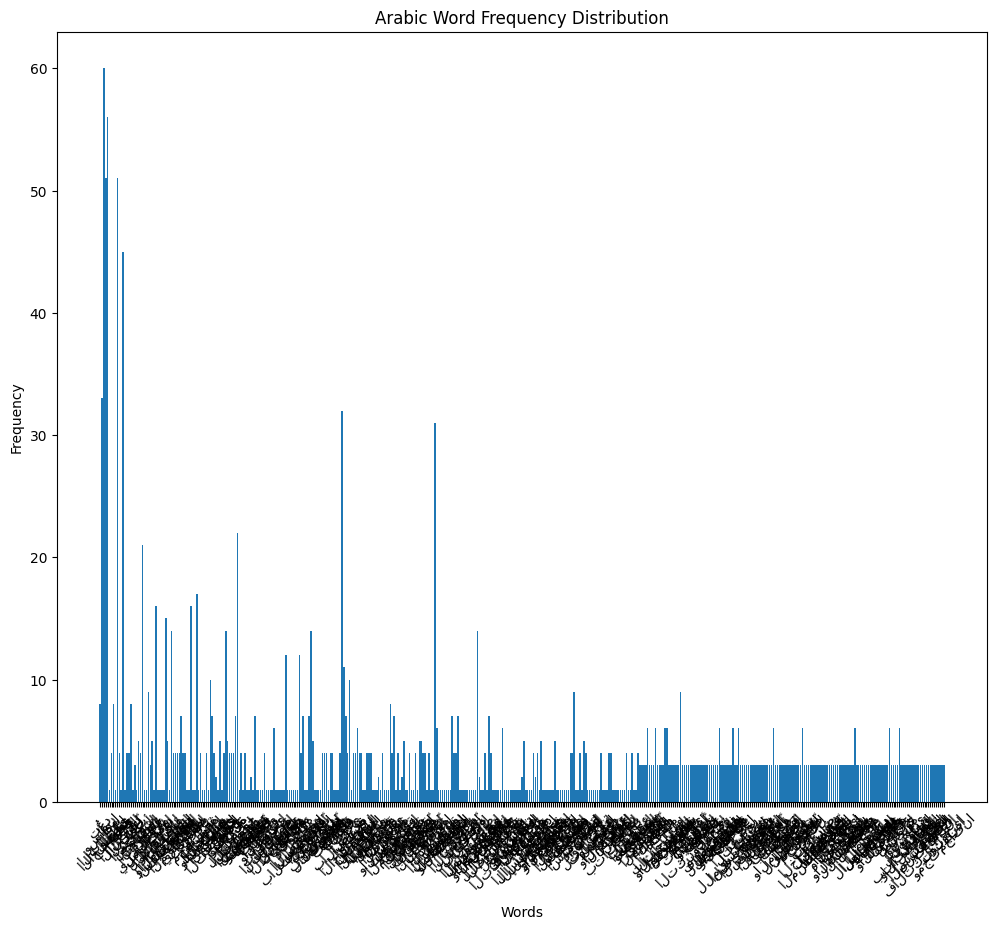

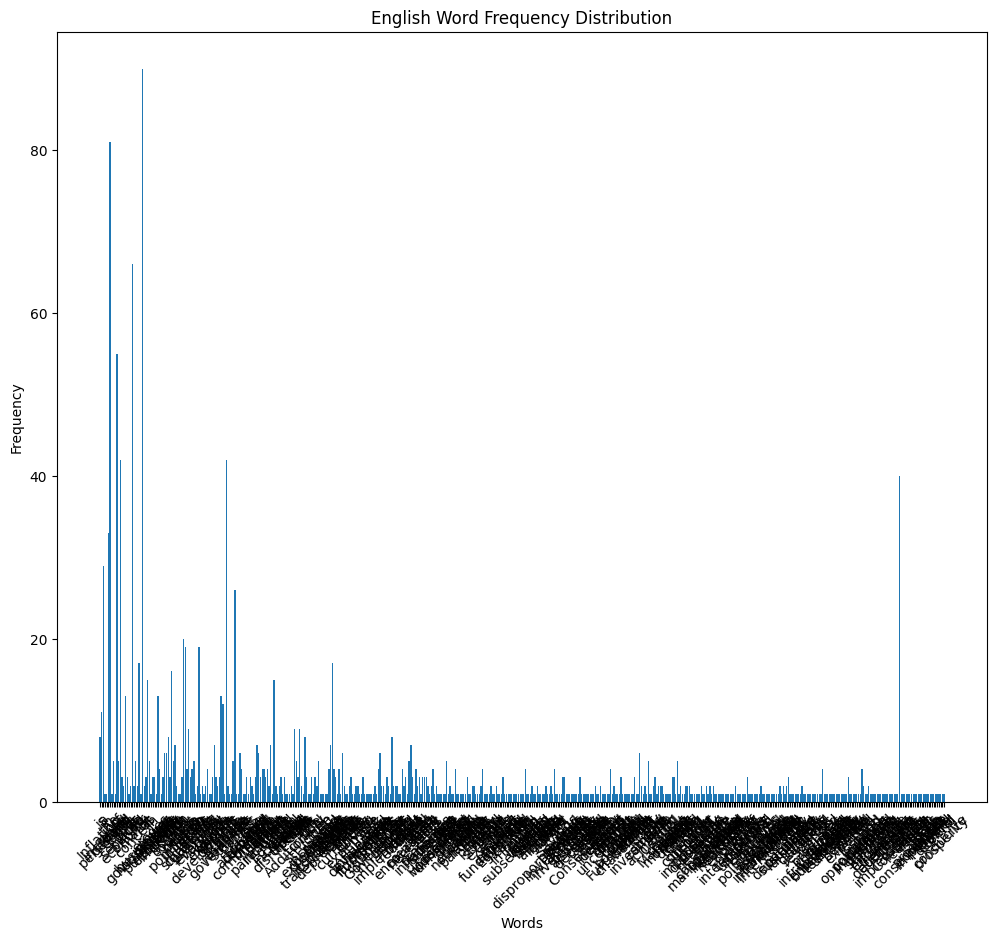

In [150]:
import matplotlib.pyplot as plt
from collections import Counter

token_eng1 = [token.text for token in token_eng]

freq_dist_arabic = Counter(tekon_ara)
freq_dist_english = Counter(token_eng1)


print("Frequency Distribution for Arabic Text:", freq_dist_arabic)
print("Frequency Distribution for English Text:", freq_dist_english)


plt.figure(figsize=(12, 10))
plt.bar(freq_dist_arabic.keys(), freq_dist_arabic.values())
plt.title("Arabic Word Frequency Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,10))
plt.bar(freq_dist_english.keys(), freq_dist_english.values())
plt.title("English Word Frequency Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


### 1.Comparing the percentage of important words

In [152]:

def lexical_diversity_english(text):
    doc = nlp(text)
    words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    num_tokens = len(words) 
    num_types = len(set(words))  
    if num_tokens == 0:
        return 0  
    return num_types / num_tokens 


def lexical_diversity_arabic(text):
   
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'[ًٌُِّْْ]', '', text) 
    words = re.findall(r'\b[أ-ي]{2,}\b', text)  
    num_tokens = len(words)
    num_types = len(set(words))  
    if num_tokens == 0:
        return 0  
    return num_types / num_tokens  



In [158]:
important_words_english = extract_important_words_english(text_english)
important_words_arabic = extract_important_words_arabic(text_arabic)


percentage_english = calculate_percentage_of_important_words(text_english, important_words_english)
percentage_arabic = calculate_percentage_of_important_words(text_arabic, important_words_arabic)


print(f"Percentage of important words in English text: {percentage_english:.2f}%")
print(f"Percentage of important words in Arabic text: {percentage_arabic:.2f}%")

Percentage of important words in English text: 41.53%
Percentage of important words in Arabic text: 95.02%


### Lexical Diversity Analysis 
**refers to the measure of how varied the vocabulary is in a given text. It's a useful metric for understanding the richness of the language used and how much repetition occurs in the text.**

In [153]:
def extract_important_words_english(text):
    doc = nlp(text)
  
    important_words = [token.text for token in doc if token.pos_ in ['NOUN', 'VERB']]
    return important_words


def extract_important_words_arabic(text):
    
    important_words = re.findall(r'\b[أ-ي]{2,}\b', text)
    return important_words


def calculate_percentage_of_important_words(text, important_words):
    total_words = len(re.findall(r'\b\w+\b', text)) 
    important_percentage = (len(important_words) / total_words) * 100
    return important_percentage    

In [159]:
english_lexical_diversity = lexical_diversity_english(text_english)
arabic_lexical_diversity = lexical_diversity_arabic(text_arabic)


print(f"Lexical Diversity of English text: {english_lexical_diversity:.4f}")
print(f"Lexical Diversity of Arabic text: {arabic_lexical_diversity:.4f}")

Lexical Diversity of English text: 0.4798
Lexical Diversity of Arabic text: 0.2503


### 3.Count

In [154]:
print('Count arabic words :',len(freq_dist_arabic))

Count arabic words : 437


In [156]:
print('Count english words :',len(freq_dist_english))

Count english words : 495


### most 10 word common

In [155]:
most_10_word_common = freq_dist_arabic.most_common(10)
print('most 10 word in text :\n',most_10_word_common)

most 10 word in text :
 [('التواصل', 60), ('من', 56), ('الاجتماعي', 51), ('على', 51), ('في', 45), ('وسائل', 33), ('إلى', 32), ('أن', 31), ('يمكن', 22), ('حيث', 21)]


In [157]:
most_10_word_common = freq_dist_english.most_common(10)
print('most 10 word in text :\n',most_10_word_common)

most 10 word in text :
 [(',', 90), ('the', 81), ('.', 66), ('of', 55), ('and', 42), ('to', 42), ('_', 40), ('in', 33), ('a', 29), ('\n', 26)]


## After

Frequency Distribution for Arabic Text: Counter({'التواصل': 60, 'الاجتماعي': 51, 'وسائل': 33, 'يمكن': 25, 'حيث': 21, 'التأثيرات': 15, 'لوسائل': 14, 'ذلك': 14, 'الوسائل': 14, 'هذه': 14, 'مما': 12, 'السلبية': 12, 'قد': 11, 'خلال': 10, 'الاجتماعية': 10, 'الناس': 9, 'استخدامها': 9, 'أنها': 9, 'تعد': 8, 'أصبحت': 8, 'يؤدي': 8, 'سواء': 7, 'المحتوى': 7, 'التجارية': 7, 'أيضا': 7, 'الفوائد': 7, 'لهذه': 7, 'تؤدي': 7, 'سلبية': 7, 'العديد': 7, 'الشخصية': 7, 'استخدام': 7, 'مثل': 6, 'الأفراد': 6, 'الاستخدام': 6, 'كيفية': 6, 'والمجتمعات': 6, 'حد': 6, 'متابعة': 6, 'إذ': 6, 'البعض': 6, 'المهم': 6, 'هي': 6, 'طريقة': 6, 'حياتنا': 5, 'العالم': 5, 'الإيجابية': 5, 'بشكل': 5, 'وسيلة': 5, 'مصدرا': 5, 'للأفراد': 5, 'الصحة': 5, 'النفسية': 5, 'التعليم': 5, 'تعليمية': 5, 'تعزيز': 5, 'تكون': 5, 'الظواهر': 4, 'حياة': 4, 'الحديث': 4, 'فقد': 4, 'اليومية': 4, 'قدرتها': 4, 'تقريب': 4, 'المسافات': 4, 'كانوا': 4, 'يعيشون': 4, 'منصة': 4, 'المهارات': 4, 'التعليمي': 4, 'علاوة': 4, 'فعالة': 4, 'للترويج': 4, 'للأعمال': 4, 'الش

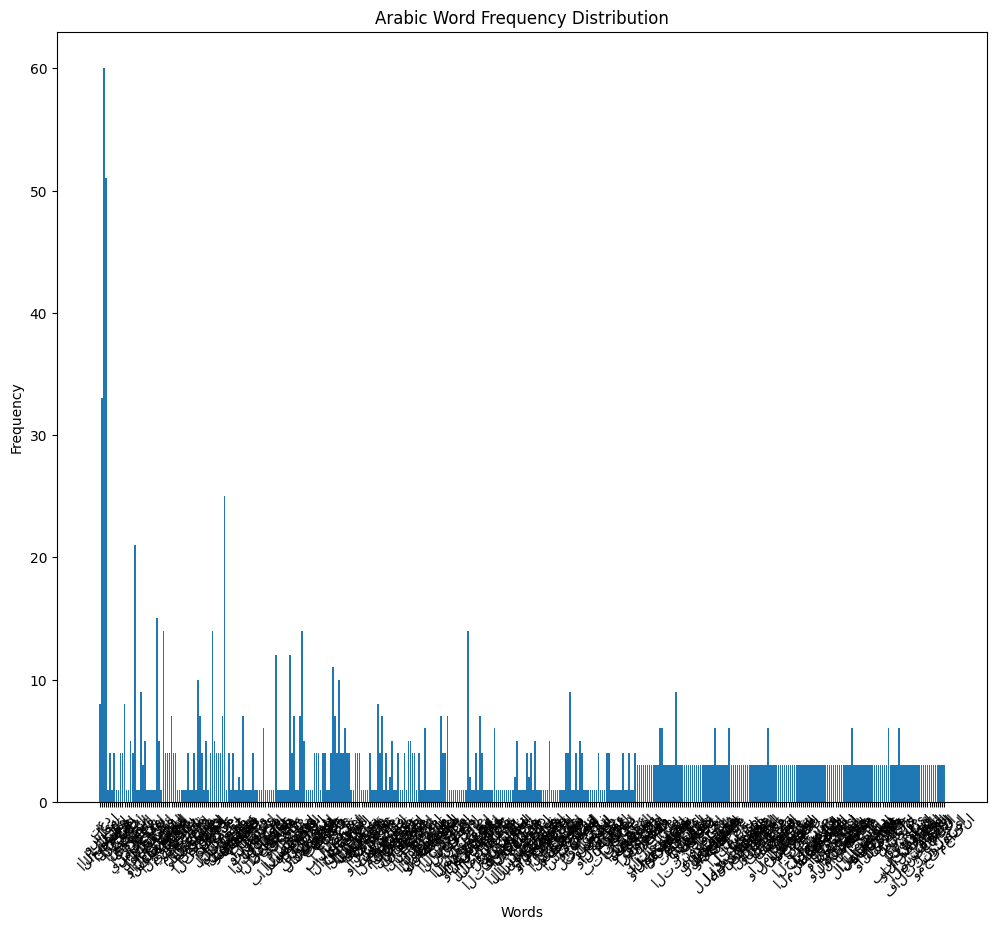

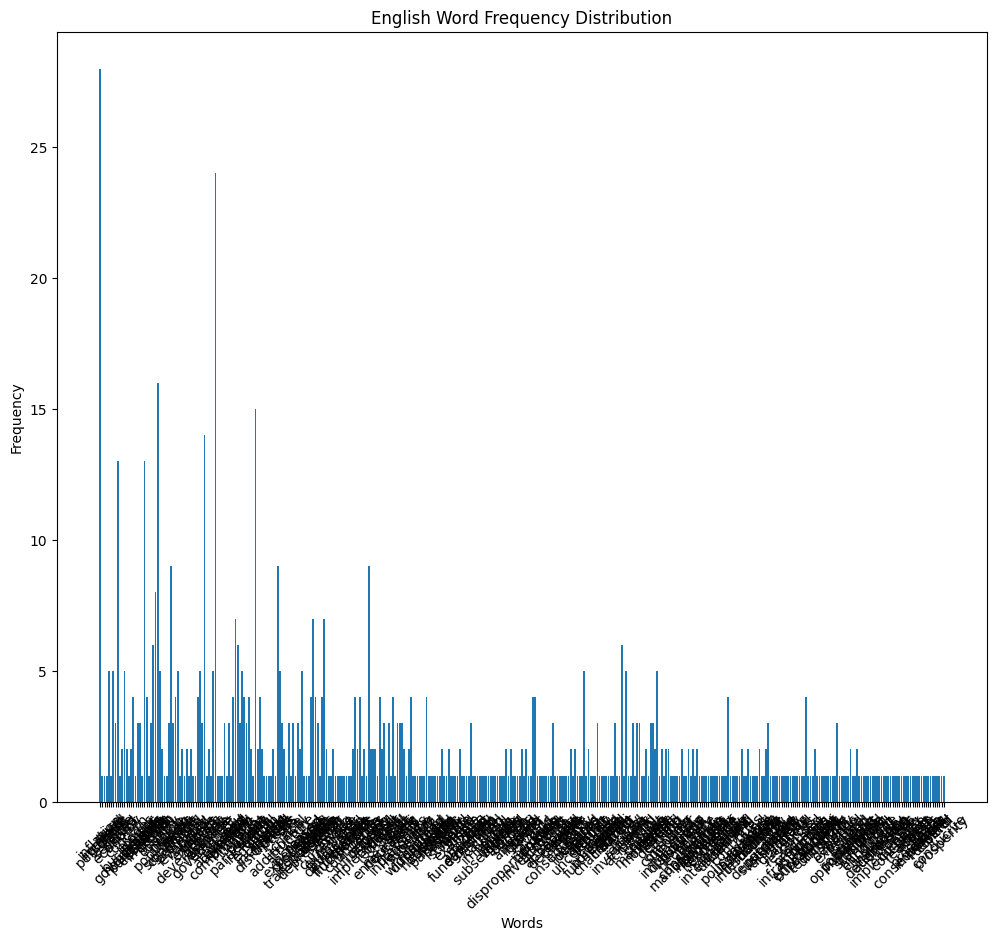

In [160]:
token_eng = [token.text for token in doc_eng]

freq_dist_arabic2 = Counter(token_ara_without_diacritics)
freq_dist_english2 = Counter(token_eng)


print("Frequency Distribution for Arabic Text:", freq_dist_arabic2)
print("Frequency Distribution for English Text:", freq_dist_english2)


plt.figure(figsize=(12,10))
plt.bar(freq_dist_arabic2.keys(), freq_dist_arabic2.values())
plt.title("Arabic Word Frequency Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,10))
plt.bar(freq_dist_english2.keys(), freq_dist_english2.values())
plt.title("English Word Frequency Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [165]:
important_words_english = extract_important_words_english(text_eng)
important_words_arabic = extract_important_words_arabic(text_ara)


percentage_english = calculate_percentage_of_important_words(text_eng, important_words_english)
percentage_arabic = calculate_percentage_of_important_words(text_ara, important_words_arabic)


print(f"Percentage of important words in English text: {percentage_english:.2f}%")
print(f"Percentage of important words in Arabic text: {percentage_arabic:.2f}%")

Percentage of important words in English text: 72.94%
Percentage of important words in Arabic text: 98.29%


In [166]:
english_lexical_diversity = lexical_diversity_english(text_english)
arabic_lexical_diversity = lexical_diversity_arabic(text_arabic)


print(f"Lexical Diversity of English text: {english_lexical_diversity:.4f}")
print(f"Lexical Diversity of Arabic text: {arabic_lexical_diversity:.4f}")

Lexical Diversity of English text: 0.4798
Lexical Diversity of Arabic text: 0.2503


In [161]:
print('Count arabic words :',len(freq_dist_arabic2))

Count arabic words : 414


In [163]:
print('Count english words :',len(freq_dist_english2))

Count english words : 381


In [162]:
most_10_word_common = freq_dist_arabic2.most_common(10)
print('most 10 word in text :\n',most_10_word_common)

most 10 word in text :
 [('التواصل', 60), ('الاجتماعي', 51), ('وسائل', 33), ('يمكن', 25), ('حيث', 21), ('التأثيرات', 15), ('لوسائل', 14), ('ذلك', 14), ('الوسائل', 14), ('هذه', 14)]


In [164]:
most_10_word_common = freq_dist_english.most_common(10)
print('most 10 word in text :\n',most_10_word_common)

most 10 word in text :
 [(',', 90), ('the', 81), ('.', 66), ('of', 55), ('and', 42), ('to', 42), ('_', 40), ('in', 33), ('a', 29), ('\n', 26)]
